## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
import yfinance as yf 
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
# data[ticker] = wb.DataReader(ticker, data_source='iex', start='2015-1-1')['close']
data[ticker] = yf.download(ticker, start='2015-1-1')['Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5064\1318533436.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker] = yf.download(ticker, start='2015-1-1')['Close']
[*********************100%***********************]  1 of 1 completed


***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    514.330017
Name: 2025-11-04 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [3]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [5]:
price_list[0] = S0
price_list

array([[514.33001709, 514.33001709, 514.33001709, ..., 514.33001709,
        514.33001709, 514.33001709],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [6]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [7]:
price_list

array([[ 514.33001709,  514.33001709,  514.33001709, ...,  514.33001709,
         514.33001709,  514.33001709],
       [ 508.07549152,  531.51879503,  512.92796678, ...,  516.52452375,
         515.39886441,  512.4821921 ],
       [ 501.47510111,  527.57207168,  518.65925299, ...,  516.1893485 ,
         511.85081751,  503.1973237 ],
       ...,
       [ 921.75187181,  748.59036227, 1228.18957154, ...,  717.4537125 ,
         758.14396976,  588.43179513],
       [ 934.35954237,  724.67175414, 1236.1454899 , ...,  699.63508635,
         783.80369551,  588.91759873],
       [ 920.26113654,  714.96934418, 1261.03841919, ...,  701.10517537,
         784.41738174,  588.82368686]])

Finally, plot the obtained price list data.

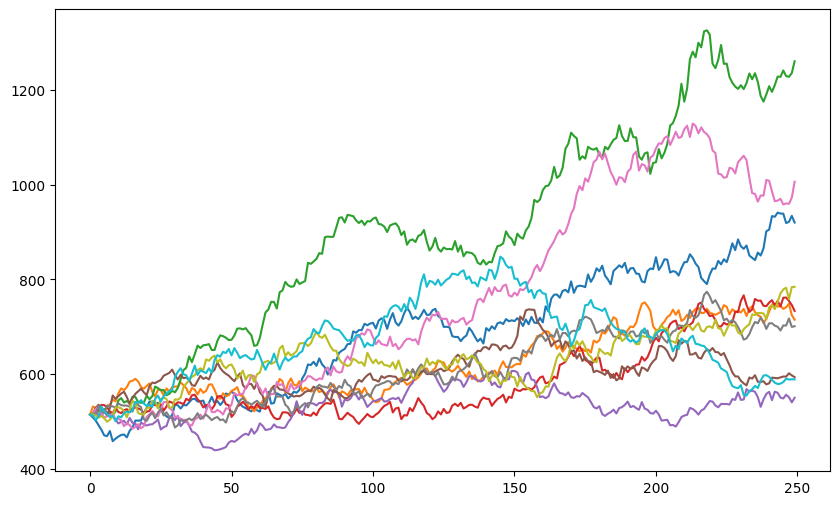

In [8]:
plt.figure(figsize=(10,6))
plt.plot(price_list);